![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

## **ETL Y EDA**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




In [1]:
# Carga de librerias necesarias para el proceso de ETL
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', None)

Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

## Extracción de los datos

- Se extrae la data desde el archivo entregado, creamos un DataFrame para procesarlo y poder ver la estructura del mismo

In [2]:
df_main = pd.read_excel('datasets/BBDD_Hospitalización.xlsx')
df_main

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Eliminar espacios en blanco en los datos del dataframe, para evitar posibles errores de digitación.
def eliminar_espacios(valor):
    if isinstance(valor,str):
        return valor.strip()
    return valor

df_main = df_main.applymap(eliminar_espacios)

In [4]:
# Filtramos y eliminamos filas duplicadas
df_main[df_main.duplicated(keep=False)]
df_main = df_main.drop_duplicates(subset=df_main.columns, keep='first')
df_main = df_main.reset_index(drop=True)

In [5]:
# Hemos pasado de un DataFrame de 570 filas a 461 luego de eliminar filas duplicadas.
df_main

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
457,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
458,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
459,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [6]:
# Verificación tipo de dato en cada columna del DF
def verificar_datos(df):
    verif = {"nombre_campo": [], "tipo_dato": [], "%_No_Nulos": [], "%_Nulos": [], "Nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        verif["nombre_campo"].append(columna)
        verif["tipo_dato"].append(df[columna].dtypes)
        verif["%_No_Nulos"].append(round(porcentaje_no_nulos, 2))
        verif["%_Nulos"].append(round(100 - porcentaje_no_nulos, 2))
        verif["Nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(verif)
        
    return df_info

verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,EDAD,float64,99.78,0.22,1
1,DIABETES,object,99.78,0.22,1
2,HOSPITALIZACIÓN ULTIMO MES,object,99.78,0.22,1
3,PSA,float64,98.92,1.08,5
4,BIOPSIAS PREVIAS,object,99.35,0.65,3
5,VOLUMEN PROSTATICO,object,99.57,0.43,2
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,object,99.78,0.22,1
7,NUMERO DE MUESTRAS TOMADAS,float64,99.78,0.22,1
8,CUP,object,99.57,0.43,2
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,object,99.35,0.65,3


In [7]:
# Renombrando los encabezados
df_main.rename(columns={
    'EDAD': 'edad',
    'DIABETES': 'diabetes',
    'HOSPITALIZACIÓN ULTIMO MES': 'hosp_ult_mes',
    'PSA': 'psa',
    'BIOPSIAS PREVIAS': 'biop_prev',
    'VOLUMEN PROSTATICO': 'vol_prostatico',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'antib_en_profilaxis',
    'NUMERO DE MUESTRAS TOMADAS': 'n_muestras',
    'CUP': 'cup',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'e_cpo',
    'BIOPSIA': 'biopsia',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'n_dias_con_infecc',
    'FIEBRE': 'fiebre',
    'ITU': 'itu',
    'TIPO DE CULTIVO': 'tipo_cultivo',
    'AGENTE AISLADO': 'agente_aislado',
    'PATRON DE RESISTENCIA': 'patron_resistencia',
    'HOSPITALIZACION': 'hospitalizacion',
    'DIAS HOSPITALIZACION MQ': 'dias_hosp_mq',
    'DIAS HOSPITALIZACIÓN UPC': 'dias_hosp_upc'
}, inplace=True)

In [8]:
# Convertimos las columnas 'edad', 'n_muestras', 'dias_hosp_mq', 'dias_hosp_upc' a dato tipo entero.
df_main['edad'] = df_main['edad'].astype('Int64')
df_main['n_muestras'] = df_main['n_muestras'].astype('Int64')
df_main['dias_hosp_mq'] = df_main['dias_hosp_mq'].astype('Int64')
df_main['dias_hosp_upc'] = df_main['dias_hosp_upc'].astype('Int64')

In [9]:
verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,Int64,99.78,0.22,1
1,diabetes,object,99.78,0.22,1
2,hosp_ult_mes,object,99.78,0.22,1
3,psa,float64,98.92,1.08,5
4,biop_prev,object,99.35,0.65,3
5,vol_prostatico,object,99.57,0.43,2
6,antib_en_profilaxis,object,99.78,0.22,1
7,n_muestras,Int64,99.78,0.22,1
8,cup,object,99.57,0.43,2
9,e_cpo,object,99.35,0.65,3


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [10]:
df_main.describe()

,edad,psa,n_muestras,dias_hosp_mq,dias_hosp_upc
count,460.0,456.000000,460.0,460.0,460.0
mean,64.213043,14.065921,12.923913,0.204348,0.017391
std,9.817853,17.043606,3.970572,1.061088,0.218236
min,39.0,0.600000,4.0,0.0,0.0
25%,59.0,5.700000,12.0,0.0,0.0
50%,64.0,8.000000,12.0,0.0,0.0
75%,69.0,15.887500,12.0,0.0,0.0
max,151.0,100.000000,24.0,12.0,3.0


In [11]:
# 1. Identificar los valores atípicos
# Puedes usar algún método para detectar valores atípicos, como Z-Score

# Ejemplo con Z-Score
z_scores = (df_main['edad'] - df_main['edad'].mean()) / df_main['edad'].std()
outliers = (z_scores.abs() > 3)  # Puedes ajustar el umbral según tus necesidades

# 2. Reemplazar los valores atípicos con la mediana
median_value = df_main['edad'].median()
df_main.loc[outliers, 'edad'] = median_value
# Ahora, df_main contiene la mediana en lugar de los valores atípicos en 'edad'


In [12]:
def visualizar_outliers_plotly(df, columna):
    fig = px.box(df, y=columna, title=f'Boxplot de {columna}')
    fig.show()
visualizar_outliers_plotly(df_main, 'edad')
visualizar_outliers_plotly(df_main, 'psa')
visualizar_outliers_plotly(df_main, 'n_muestras')
visualizar_outliers_plotly(df_main, 'dias_hosp_mq')
visualizar_outliers_plotly(df_main, 'dias_hosp_upc')

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [13]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
457,69,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
458,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0
459,59,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0,0


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

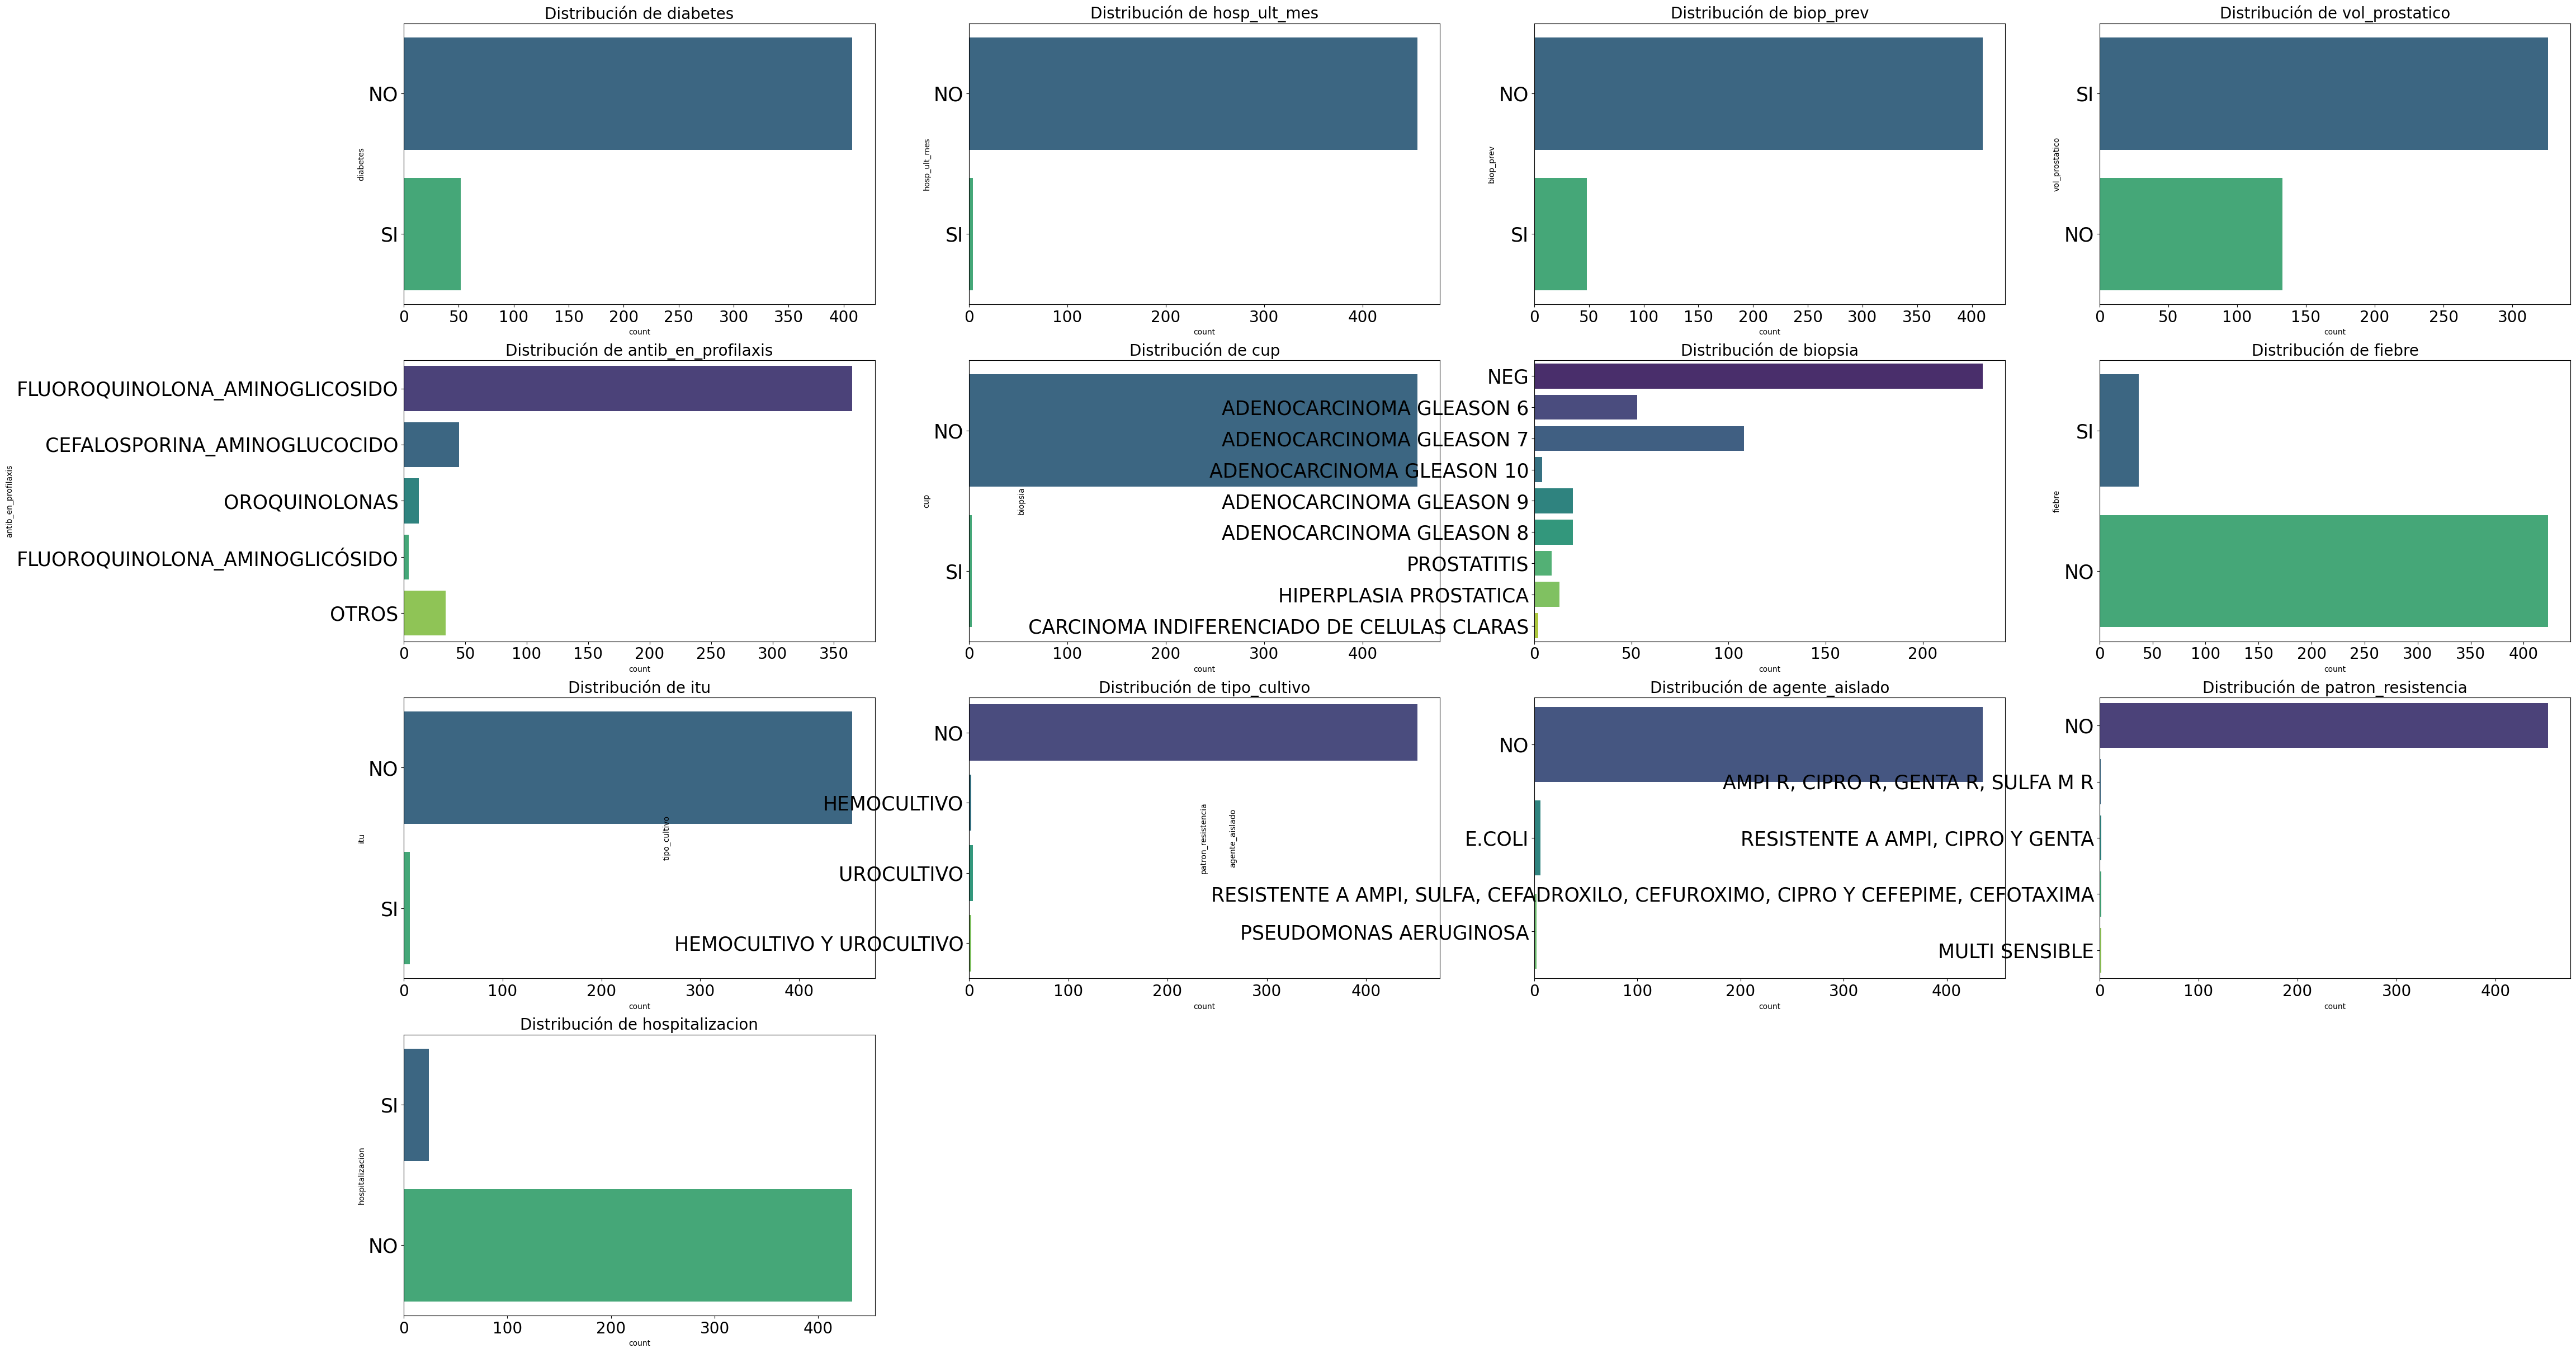

In [14]:
# Lista de variables categóricas
variables_categoricas = ['diabetes', 'hosp_ult_mes', 'biop_prev', 'vol_prostatico', 'antib_en_profilaxis', 'cup',
                         'biopsia', 'fiebre', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion']

# Establecer el tamaño de la figura
plt.figure(figsize=(50, 30))

# Iterar sobre las variables categóricas y crear subgráficos
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(4, 4, i)  # Ajustar según sea necesario
    sns.countplot(y=variable, data=df_main, palette='viridis')  # Cambiado x por y
    plt.title(f'Distribución de {variable}', fontsize=20)
    # Ajustar el tamaño de las etiquetas del eje y
    plt.tick_params(axis='y', labelsize=25)  # Puedes ajustar el tamaño según sea necesario
    
    # Ajustar el tamaño de las etiquetas del eje x
    plt.tick_params(axis='x', labelsize=20)  # Puedes ajustar el tamaño según sea necesario
    
plt.tight_layout(pad=1)
plt.show()


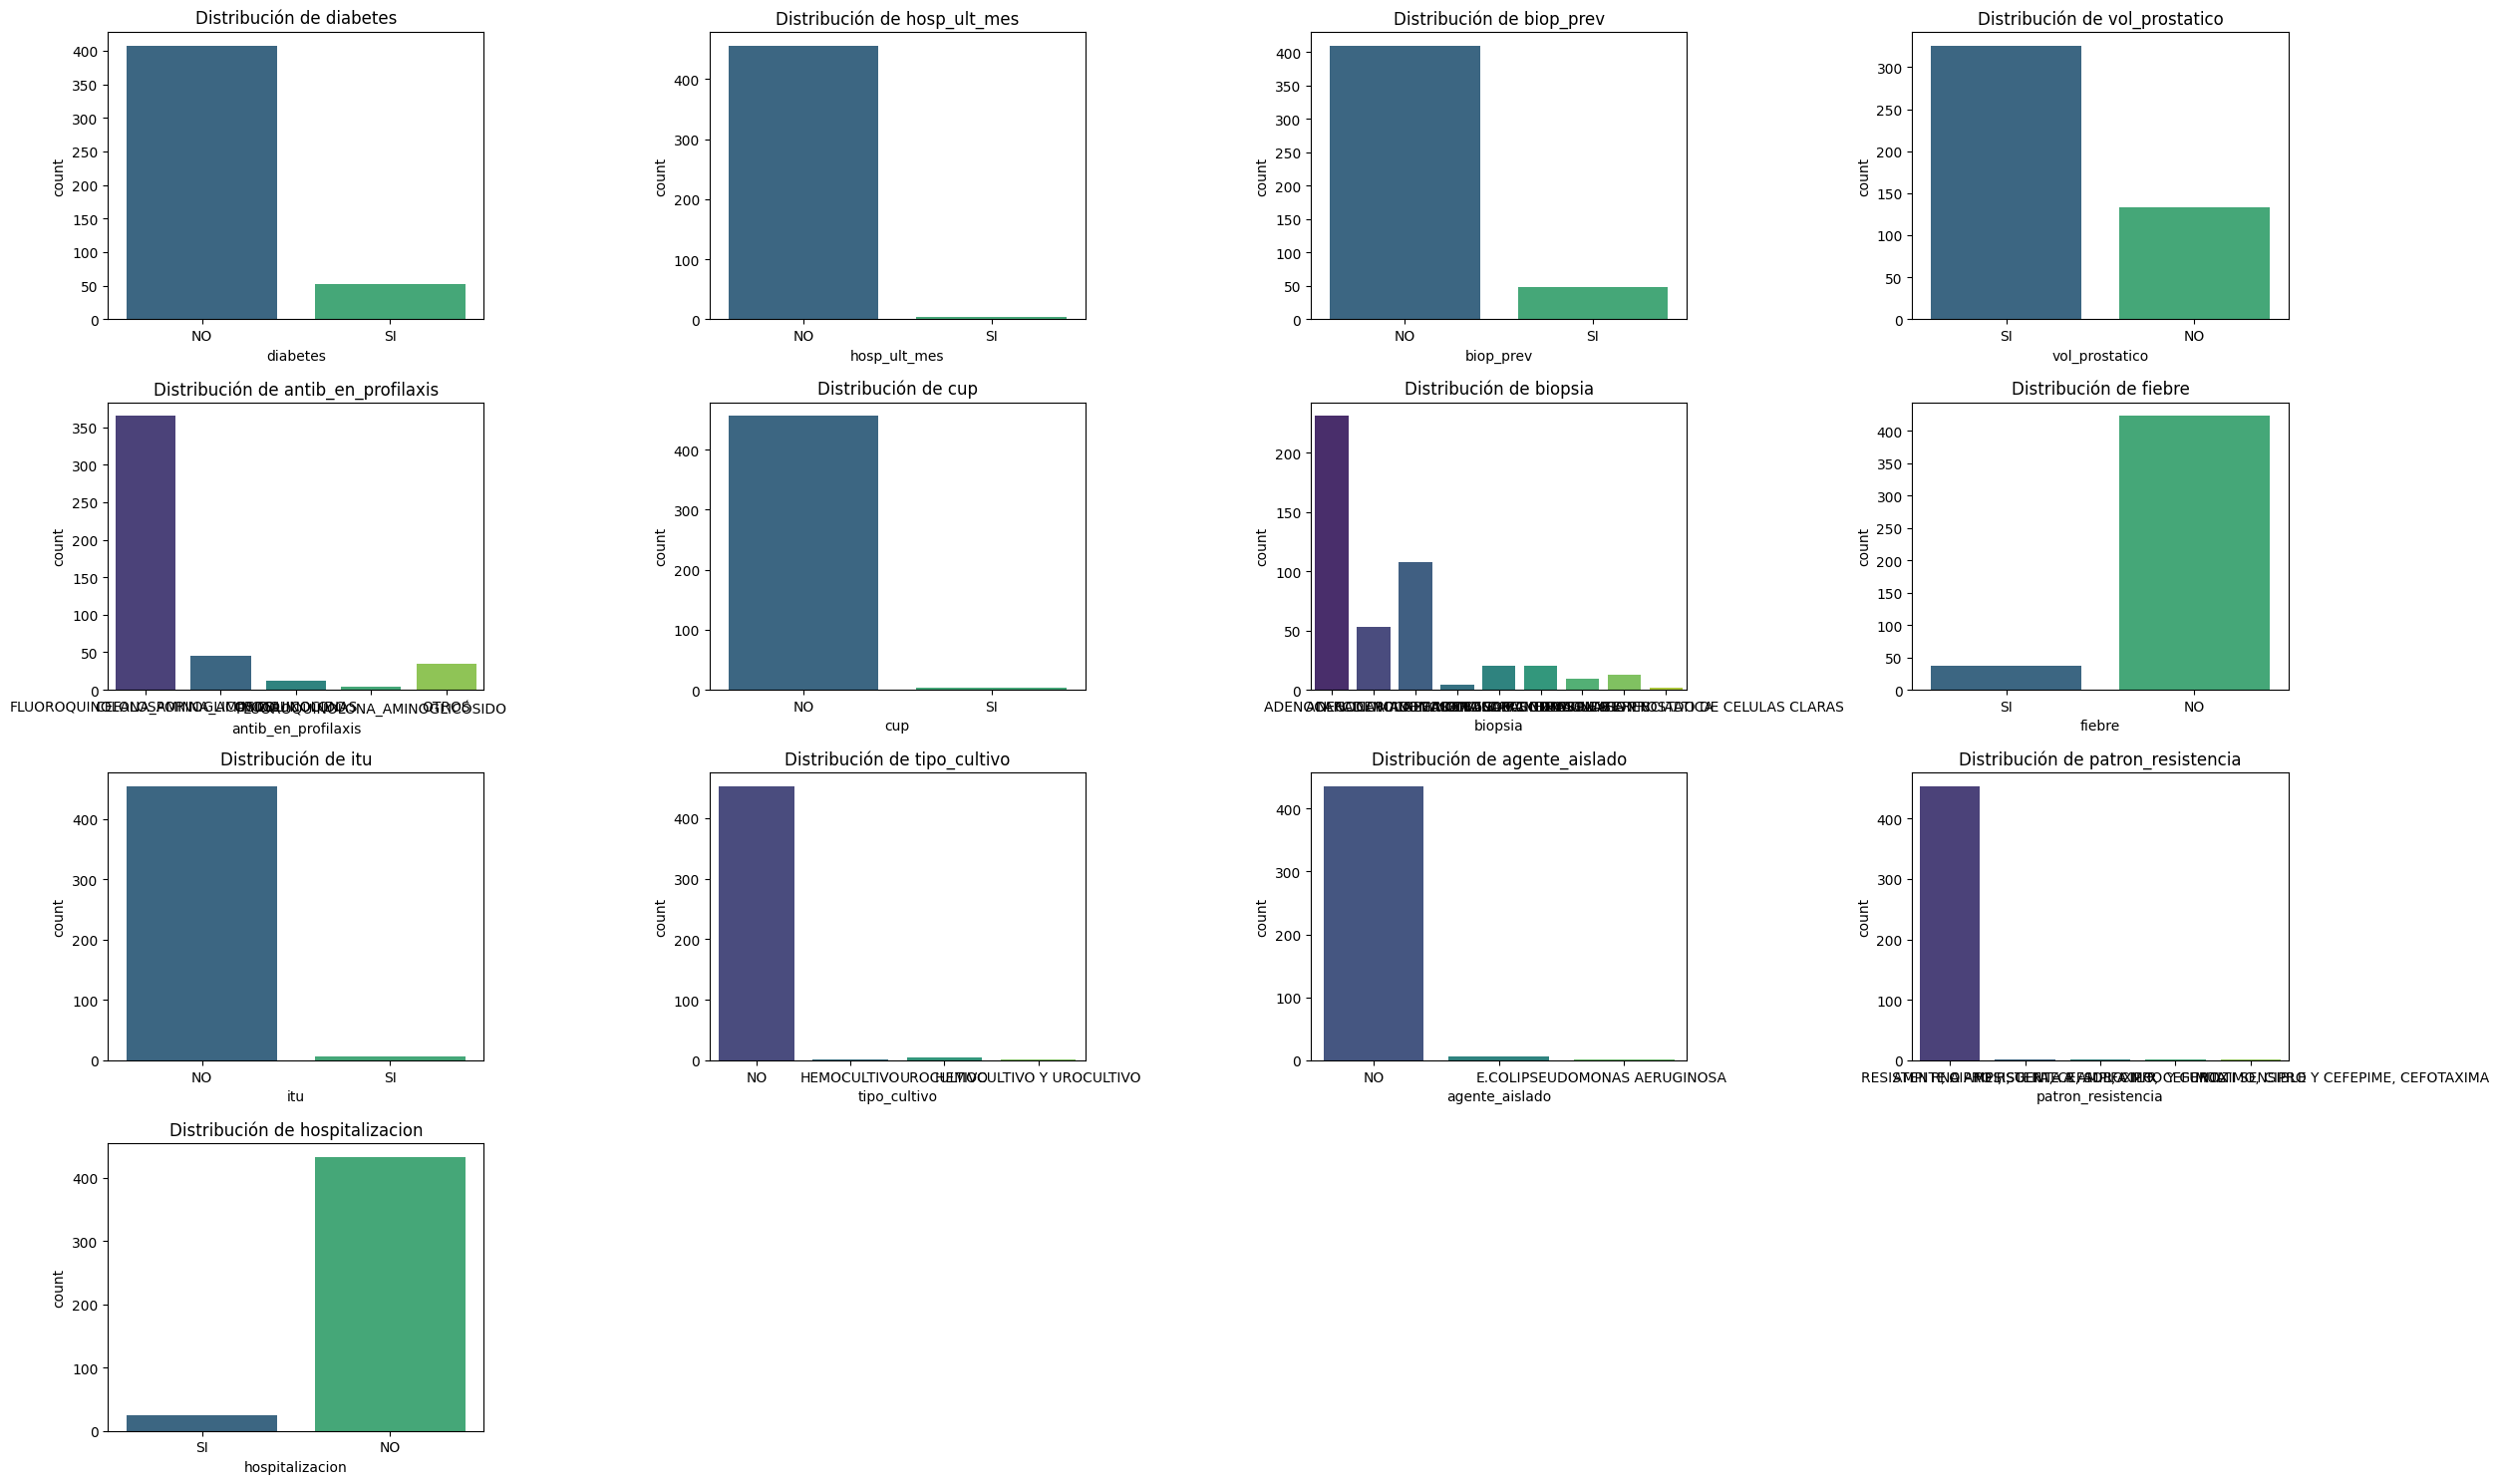

In [15]:
# Lista de variables categóricas
variables_categoricas = ['diabetes', 'hosp_ult_mes', 'biop_prev', 'vol_prostatico', 'antib_en_profilaxis', 'cup',
                         'biopsia', 'fiebre', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion']

# Establecer el tamaño de la figura
plt.figure(figsize=(25, 15))

# Iterar sobre las variables categóricas y crear subgráficos
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(4, 4, i)  # Ajustar según sea necesario
    sns.countplot(x=variable, data=df_main, palette='viridis')
    plt.title(f'Distribución de {variable}')

plt.tight_layout()
plt.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [16]:
df_main.isnull().sum()

edad                    1
diabetes                1
hosp_ult_mes            1
psa                     5
biop_prev               3
vol_prostatico          2
antib_en_profilaxis     1
n_muestras              1
cup                     2
e_cpo                   3
biopsia                 1
n_dias_con_infecc       1
fiebre                  1
itu                     1
tipo_cultivo            1
agente_aislado         18
patron_resistencia      1
hospitalizacion         4
dias_hosp_mq            1
dias_hosp_upc           1
dtype: int64

In [17]:
# Borramos los registros nulos, porque:
# Un conjunto de datos más limpio facilita la aplicación de análisis estadísticos y modelos predictivos. La presencia de
# valores nulos puede complicar estos procesos, y su eliminación simplifica la realización de análisis descriptivos y predictivos.
df_main = df_main.dropna()

In [18]:
verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,Int64,100.0,0.0,0
1,diabetes,object,100.0,0.0,0
2,hosp_ult_mes,object,100.0,0.0,0
3,psa,float64,100.0,0.0,0
4,biop_prev,object,100.0,0.0,0
5,vol_prostatico,object,100.0,0.0,0
6,antib_en_profilaxis,object,100.0,0.0,0
7,n_muestras,Int64,100.0,0.0,0
8,cup,object,100.0,0.0,0
9,e_cpo,object,100.0,0.0,0


Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [19]:
# Mostrar datos unicos de nuestro DF, por columna en una tabla
## Se deja como esta, porque estos datos estan listos para poder seguir trabajandolos
def valores_unicos_columnas_type_int_bool(df):
    tabla_datos = {"Columna": [], "Valores Únicos": []}

    for columna in df.columns:
        if pd.api.types.is_integer_dtype(df[columna]) or pd.api.types.is_float_dtype(df[columna]):
            valores_unicos = df[columna].unique().tolist()
            tabla_datos["Columna"].append(columna)
            tabla_datos["Valores Únicos"].append(valores_unicos)

    df_tabla = pd.DataFrame(tabla_datos)
    return df_tabla

valores_unicos_columnas_type_int_bool(df_main)

,Columna,Valores Únicos
0,edad,"[53, 56, 57, 55, 67, 69, 54, 68, 43, 65, 62, 7..."
1,psa,"[4.0, 7.7, 29.0, 7.0, 6.2, 6.0, 5.7, 4.3, 5.19..."
2,n_muestras,"[12, 24, 18, 6, 16, 10, 4, 8, 15, 22, 14, 20]"
3,dias_hosp_mq,"[2, 5, 4, 3, 12, 0]"
4,dias_hosp_upc,"[0, 3, 2]"


Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [20]:
# Revisamos la integridad de los datos para las variables categóricas nominales
def valores_unicos_columnas_type_object(df):
    tabla_datos = {"Columna": [], "Valores Únicos": []}

    for columna in df.columns:
        if pd.api.types.is_object_dtype(df[columna]):
            valores_unicos = df[columna].unique().tolist()
            tabla_datos["Columna"].append(columna)
            tabla_datos["Valores Únicos"].append(valores_unicos)

    df_tabla = pd.DataFrame(tabla_datos)
    return df_tabla

valores_unicos_columnas_type_object(df_main)

,Columna,Valores Únicos
0,diabetes,"[NO, SI]"
1,hosp_ult_mes,"[NO, SI]"
2,biop_prev,"[NO, SI]"
3,vol_prostatico,"[SI, NO]"
4,antib_en_profilaxis,"[FLUOROQUINOLONA_AMINOGLICOSIDO, CEFALOSPORINA..."
5,cup,"[NO, SI]"
6,e_cpo,"[NO, SI, EPOC, SI, ASMA, SI]"
7,biopsia,"[NEG, ADENOCARCINOMA GLEASON 6, ADENOCARCINOMA..."
8,n_dias_con_infecc,"[1, 2, 3, 5, 9, NO]"
9,fiebre,"[SI, NO]"


In [21]:
# Verificamos la integridad de los datos categóricos nominales que no son SI/NO
columnas = ['antib_en_profilaxis', 'biopsia', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia']

for columna in columnas:
    print(f"Valores únicos en la columna '{columna}': {df_main[columna].unique()}")
    print("-" * 40)


Valores únicos en la columna 'antib_en_profilaxis': ['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'OTROS' 'FLUOROQUINOLONA_AMINOGLICÓSIDO']
----------------------------------------
Valores únicos en la columna 'biopsia': ['NEG' 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 7'
 'ADENOCARCINOMA GLEASON 10' 'ADENOCARCINOMA GLEASON 9'
 'ADENOCARCINOMA GLEASON 8' 'PROSTATITIS' 'HIPERPLASIA PROSTATICA'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
----------------------------------------
Valores únicos en la columna 'tipo_cultivo': ['NO' 'HEMOCULTIVO' 'UROCULTIVO' 'HEMOCULTIVO Y UROCULTIVO']
----------------------------------------
Valores únicos en la columna 'agente_aislado': ['NO' 'E.COLI' 'PSEUDOMONAS AERUGINOSA']
----------------------------------------
Valores únicos en la columna 'patron_resistencia': ['NO' 'AMPI R, CIPRO R, GENTA R, SULFA M R'
 'RESISTENTE A AMPI, CIPRO Y GENTA'
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEF

In [22]:
# Cambiando un dato que estaba escrito de manera distinta, pero que se refería a lo mismo em la columna 'antib_en_profilaxi'.
df_main['antib_en_profilaxis'] = df_main['antib_en_profilaxis'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')

In [23]:
# Unificamos valores renombrando
df_main['e_cpo'] = df_main['e_cpo'].replace('SI, EPOC', 'SI')
df_main['e_cpo'] = df_main['e_cpo'].replace('SI, ASMA', 'SI')

In [24]:
# Verificamos la integridad de los datos categóricos nominales que no son SI/NO
columnas = ['antib_en_profilaxis', 'biopsia', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia']

for columna in columnas:
    print(f"Valores únicos en la columna '{columna}': {df_main[columna].unique()}")
    print("-" * 40)

Valores únicos en la columna 'antib_en_profilaxis': ['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'OTROS']
----------------------------------------
Valores únicos en la columna 'biopsia': ['NEG' 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 7'
 'ADENOCARCINOMA GLEASON 10' 'ADENOCARCINOMA GLEASON 9'
 'ADENOCARCINOMA GLEASON 8' 'PROSTATITIS' 'HIPERPLASIA PROSTATICA'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
----------------------------------------
Valores únicos en la columna 'tipo_cultivo': ['NO' 'HEMOCULTIVO' 'UROCULTIVO' 'HEMOCULTIVO Y UROCULTIVO']
----------------------------------------
Valores únicos en la columna 'agente_aislado': ['NO' 'E.COLI' 'PSEUDOMONAS AERUGINOSA']
----------------------------------------
Valores únicos en la columna 'patron_resistencia': ['NO' 'AMPI R, CIPRO R, GENTA R, SULFA M R'
 'RESISTENTE A AMPI, CIPRO Y GENTA'
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'
 'MULTI SENSIB

In [25]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
453,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
454,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0,0
455,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0,0


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [26]:
df_main['n_dias_con_infecc'] = df_main['n_dias_con_infecc'].replace('NO', 0)
df_main['n_dias_con_infecc'] = df_main['n_dias_con_infecc'].astype('Int64')

In [27]:
# Ajustamos los nombres de estos datos
df_main['patron_resistencia'] = df_main['patron_resistencia'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R', 'R AMPI, R GENTA, R SULFA')
df_main['patron_resistencia'] = df_main['patron_resistencia'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 'R AMPI, R CIPRO, R GENTA')
df_main['patron_resistencia'] = df_main['patron_resistencia'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 
                                                                            'R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA')

In [28]:
import plotly.express as px
import pandas as pd

# Paleta de colores
colors = px.colors.qualitative.Set1  # Puedes cambiar la paleta si lo deseas

columnas = ['diabetes', 'hosp_ult_mes', 'biop_prev', 'vol_prostatico', 
            'antib_en_profilaxis', 'cup', 'e_cpo', 
            'biopsia', 'fiebre', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 
            'hospitalizacion']

for columna in columnas:
    # Crear el gráfico de barras con la paleta de colores
    fig = px.bar(df_main, y=df_main[columna], color_discrete_sequence=[colors[0]])
    
    # Configuraciones del diseño
    fig.update_layout(
        title=f'Distribución de {columna}',
        xaxis_title='Frecuencia',
        yaxis_title=columna,
        yaxis=dict(categoryorder='total ascending'),  # Ordenar por frecuencia
    )

    # Mostrar el gráfico
    fig.show()

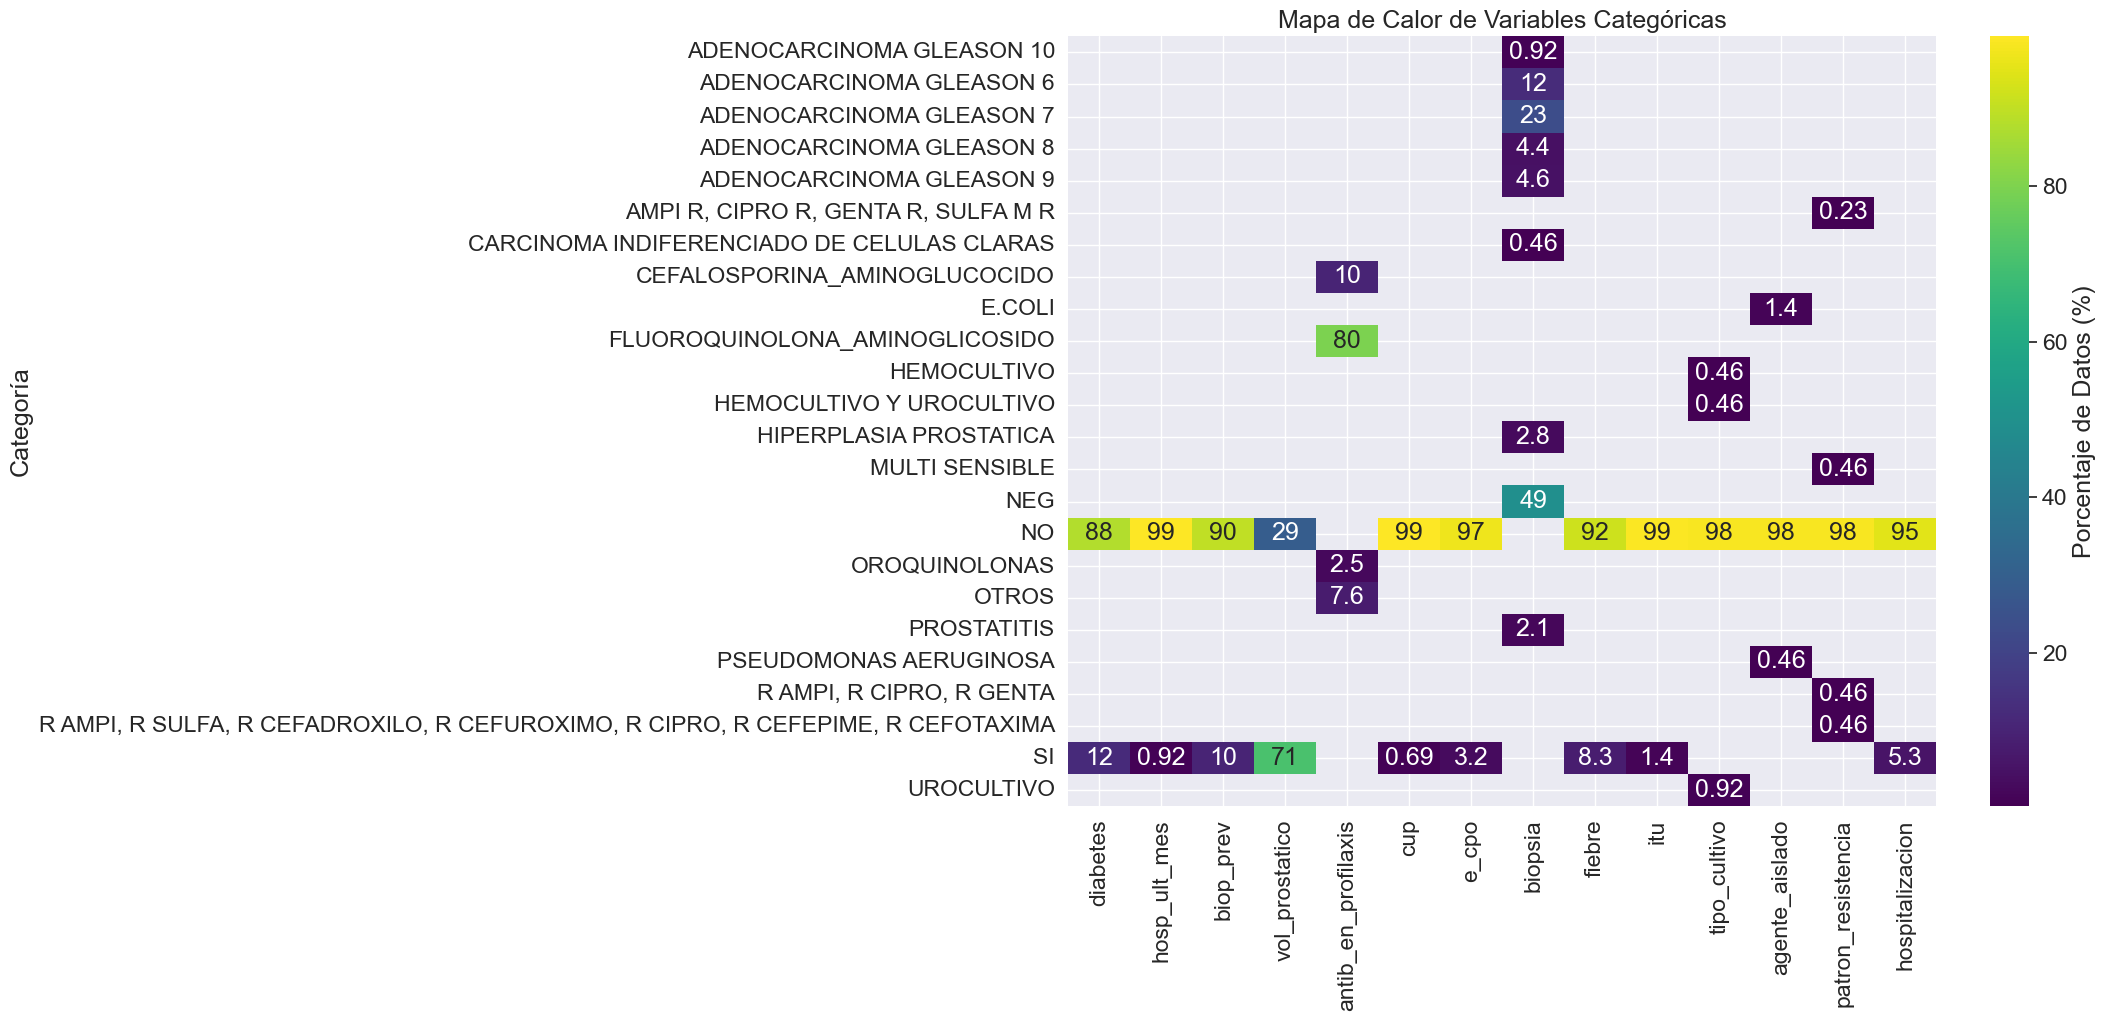

In [29]:
# Crear un DataFrame de resumen para las variables categóricas
summary_df = pd.DataFrame()

# Iterar a través de cada columna en el DataFrame original
for column in df_main.columns:
    # Verificar si la columna es de tipo 'object'
    if df_main[column].dtype == 'object':
        # Obtener las categorías únicas y sus recuentos
        category_counts = df_main[column].value_counts(normalize=True)
        
        # Crear un DataFrame temporal para esta columna
        temp_df = pd.DataFrame({
            'Categoría': category_counts.index,
            column: category_counts.values * 100
        })
        
        # Establecer la columna 'Categoría' como índice para el DataFrame temporal
        temp_df.set_index('Categoría', inplace=True)
        
        # Unir el DataFrame temporal al resumen general
        summary_df = pd.concat([summary_df, temp_df], axis=1, sort=True)

# Reemplazar los valores NaN con cadenas vacías
summary_df.replace({-1: ''}, inplace=True)

# Configurar el estilo y tamaño del mapa de calor
plt.figure(figsize=(14, 10))
sns.set(style="darkgrid", font_scale=1.5)

# Crear un mapa de calor con anotaciones y cambiar el color
sns.heatmap(summary_df, annot=True, cmap="viridis", cbar_kws={'label': 'Porcentaje de Datos (%)'})

# Agregar título y mostrar la visualización
plt.title('Mapa de Calor de Variables Categóricas', fontsize=18)
plt.show()


In [30]:
#A partir de este mapa de calor, se ha identificado que las variables HOSPITALIZACIÓN ULTIMO MES y CUP exhiben un fenómeno
# donde el 99% de los datos pertenecen a una única categoría, específicamente, 'NO' y que las columnas DIAS HOSPITALIZACION MQ y
# DIAS HOSPITALIZACIÓN UPC son irrelevantes. En consecuencia, se ha tomado la decisión de eliminar estas variables del conjunto de datos.
df_main.drop(columns=['hosp_ult_mes', 'cup', 'dias_hosp_mq', 'dias_hosp_upc'], inplace=True)

In [31]:
df_main.head()

,edad,diabetes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
0,53,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI


In [32]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 456
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 433 non-null    Int64  
 1   diabetes             433 non-null    object 
 2   psa                  433 non-null    float64
 3   biop_prev            433 non-null    object 
 4   vol_prostatico       433 non-null    object 
 5   antib_en_profilaxis  433 non-null    object 
 6   n_muestras           433 non-null    Int64  
 7   e_cpo                433 non-null    object 
 8   biopsia              433 non-null    object 
 9   n_dias_con_infecc    433 non-null    Int64  
 10  fiebre               433 non-null    object 
 11  itu                  433 non-null    object 
 12  tipo_cultivo         433 non-null    object 
 13  agente_aislado       433 non-null    object 
 14  patron_resistencia   433 non-null    object 
 15  hospitalizacion      433 non-null    object 


In [33]:
df_main

,edad,diabetes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
0,53,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO
453,70,SI,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,0,NO,NO,NO,NO,NO,NO
454,75,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO
455,67,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO


In [34]:
# Separar columnas numéricas y categóricas
numeric_columns = df_main.select_dtypes(include=['number']).columns
categorical_columns = df_main.select_dtypes(include=['object', 'category']).columns

# Crear una copia del DataFrame original
encoded_df = df_main.copy()

# Aplicar label encoding a las columnas categóricas
label_encoder = LabelEncoder()
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Mostrar el DataFrame codificado
encoded_df

,edad,diabetes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
0,53,0,4.0,0,1,1,12,0,7,1,1,0,2,1,2,1
1,56,0,7.7,0,1,1,12,0,7,1,1,0,2,1,2,1
2,57,0,29.0,1,1,1,24,0,7,1,1,0,0,0,0,1
3,56,0,7.0,0,1,1,12,0,7,1,1,0,2,1,2,1
4,55,0,29.0,1,1,1,24,0,7,1,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,0,5.0,0,0,1,12,0,2,0,0,0,2,1,2,0
453,70,1,18.0,0,1,1,12,0,7,0,0,0,2,1,2,0
454,75,0,75.0,0,1,1,12,0,3,0,0,0,2,1,2,0
455,67,0,6.0,0,1,1,12,0,1,0,0,0,2,1,2,0


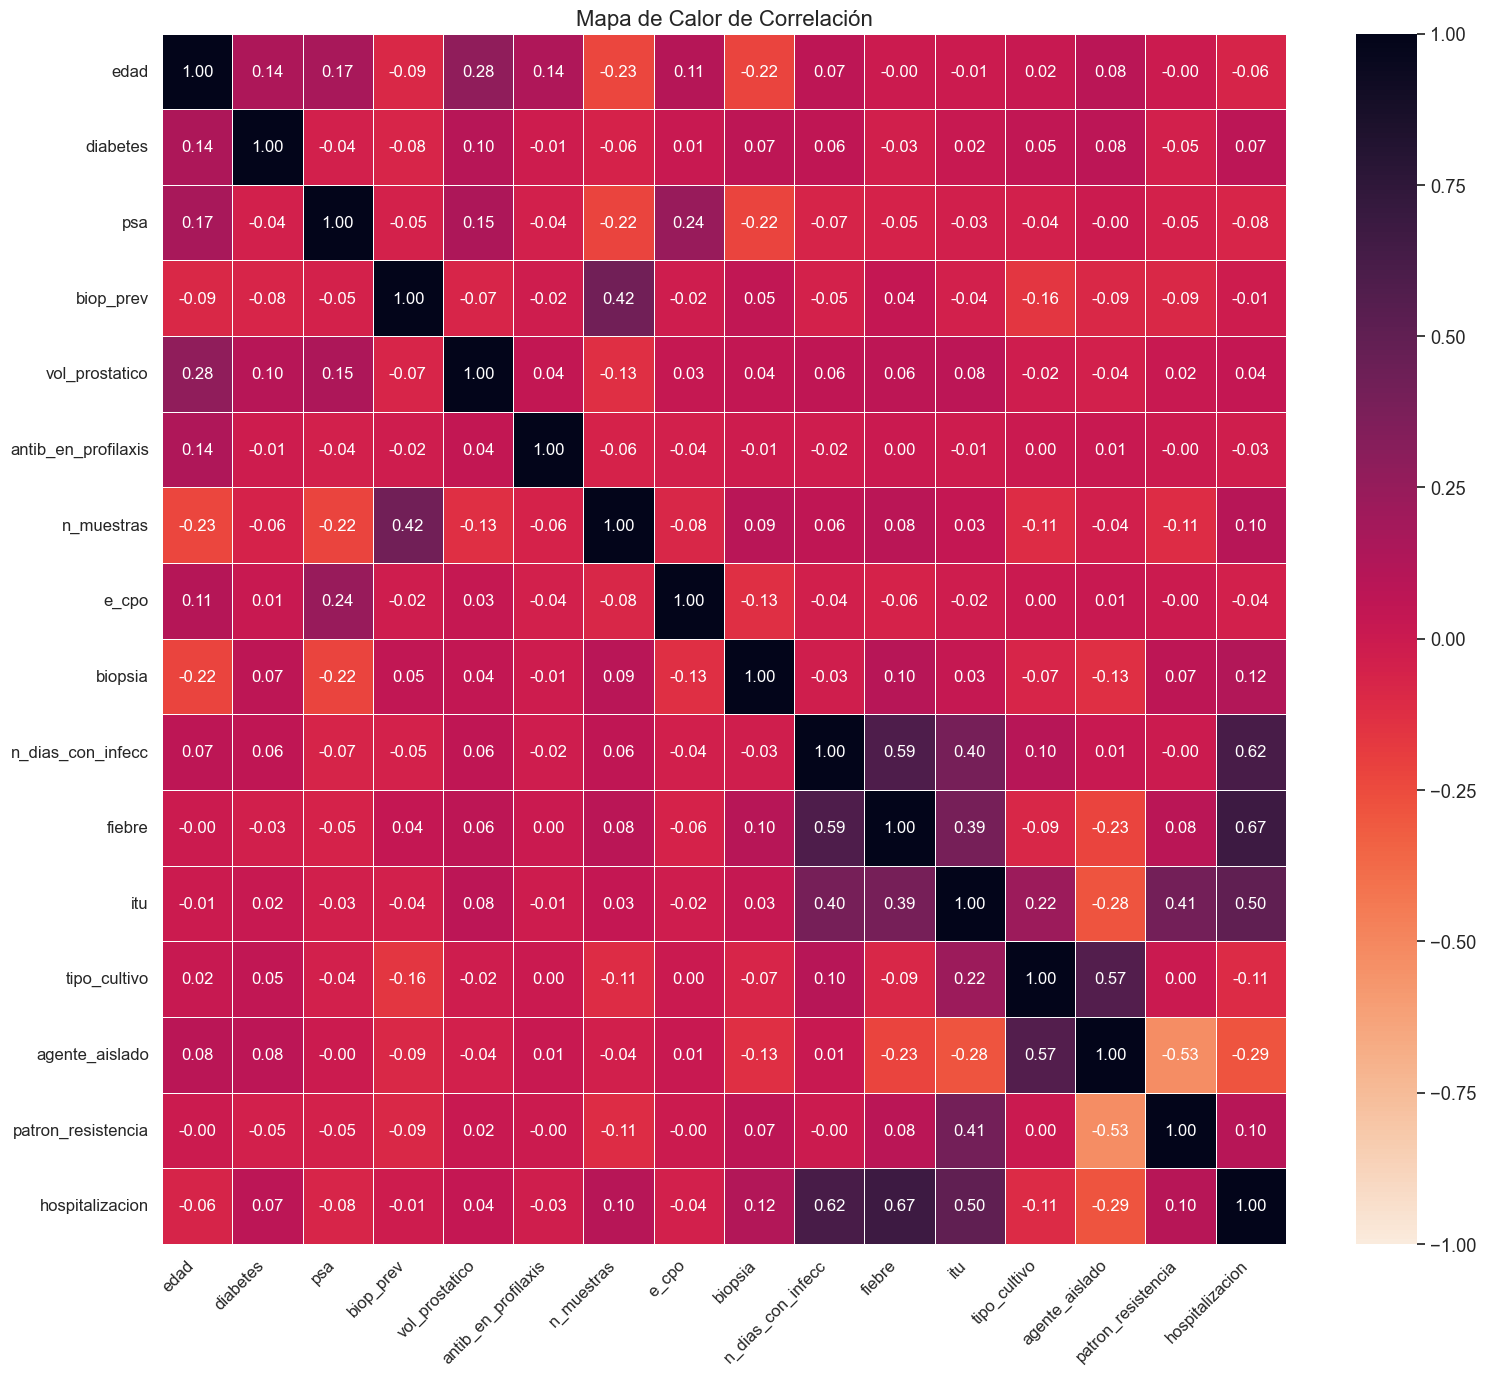

In [35]:
# Calcula la correlación
corr = encoded_df.corr()

# Configura el estilo y tamaño del gráfico
plt.figure(figsize=(16, 14))
sns.set(font_scale=1.2)

# Crea el mapa de calor
sns.heatmap(corr, cbar=True, square=False, annot=True, fmt='.2f', cmap='rocket_r',
            linewidths=0.5, annot_kws={'size': 12}, vmin=-1, vmax=1)  # Establece los límites de color

# Configura las etiquetas y límites
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Ajusta el diseño para una mejor visualización
plt.tight_layout()

# Muestra el mapa de calor
plt.show()

La significativa correlación lineal entre **fiebre** y **n_dias_con_infecc**, además ambas presentan una fuerte asociación con la variable objetivo **hospitalizacion**. Se opta por excluir **n_dias_con_infecc**, eligiendo a la variable **fiebre**.

Se observa una relación notable entre **agente_aislado**, **tipo_cultivo**, y **patron_resistencia**.Se decide conservar solo  **tipo_cultivo**.

In [36]:
df_main = df_main.drop(columns=['n_dias_con_infecc', 'agente_aislado', 'patron_resistencia'])
encoded_df_main = encoded_df.drop(columns=['n_dias_con_infecc', 'agente_aislado', 'patron_resistencia'])
df_main.columns, encoded_df_main.columns

(Index(['edad', 'diabetes', 'psa', 'biop_prev', 'vol_prostatico',
        'antib_en_profilaxis', 'n_muestras', 'e_cpo', 'biopsia', 'fiebre',
        'itu', 'tipo_cultivo', 'hospitalizacion'],
       dtype='object'),
 Index(['edad', 'diabetes', 'psa', 'biop_prev', 'vol_prostatico',
        'antib_en_profilaxis', 'n_muestras', 'e_cpo', 'biopsia', 'fiebre',
        'itu', 'tipo_cultivo', 'hospitalizacion'],
       dtype='object'))

In [37]:
df_main

,edad,diabetes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,e_cpo,biopsia,fiebre,itu,tipo_cultivo,hospitalizacion
0,53,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,SI,NO,NO,SI
1,56,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,SI,NO,NO,SI
2,57,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,SI,NO,HEMOCULTIVO,SI
3,56,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,SI,NO,NO,SI
4,55,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,SI,NO,HEMOCULTIVO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO
453,70,SI,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,NO,NO,NO,NO
454,75,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO
455,67,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO


Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [38]:
df_main.to_csv('Datasets/BBDD_hospitalizacion_2.csv', index=False, encoding='utf-8')
encoded_df_main.to_csv('Datasets/BBDD_hospitalizacion_2encod.csv', index=False, encoding='utf-8')